# Обучение с учителем

## Типы задач машинного обучения

Задачи машинного обучения можно поделить на следующие типы, в зависимости вида обучающей выборки и дальнейшей стратегии работы с полученными результатами

* Обучение с учителем (*supervised learning*) - каждый объект обучающей выборки представляет из себя пару «объект, ответ». Требуется найти функциональную зависимость ответов от описаний объектов и построить алгоритм, принимающий на входе признаковое описание объекта и выдающий на выходе ответ.
 * Регрессия - на выходе количественный признак.
 * Классификация - на выходе метка класса.
 * Прогнозирование - на вход подаются временные ряды, каждый следующий элемент ряда зависит от предыдущих, на выходе количественный признак или метка класса (для задач принятия решения).
* Обучение без учителя (*unsupervised learning*) - поиск взаимосвязей между объектами обучающей выборки.
 * Кластеризация - группировка объектов на кластеры в зависимости от расстояния между ними.
 * Сокращение размерности заключается в поиске зависимости между признаками и получение новых признаков, на основе этой зависимости. 
 * Поиск выбросов, например, с целью повысить качество обучающей выборки.
 * Заполнение пропущеных значений, когда в значения некоторых признаков у объктов отсутствуют.
 
Существует ещё целый ряд задач (частичное обучение, обучение с подкреплением, динамическое обучение и т.д.), которые в некоторых случаях являются комбинацией задач обучения с учителем и без учителя.

## Задача обучения с учителем. Регрессия

Просто говоря, обучение с учителем это когда у нас есть таблица данных $n$ столбцов на $m$ объектов или sample-ов, также имеется дополнительный столбец ($y$
) содержащий значения зависимой переменной. Начнем с ситуации когда $y$ -  количественный признак, т.е. просто число от -$\infty$ до + $\infty$. Задачей <b>регрессии</b> называется  поиск функциональной зависимости между вектором $\mathbf{x}$ и количественным признаком $y$. 


## Метод наименьших квадратов или градиентный спуск?

### Метод наименьших квадратов

Рассмотрим ситуацию с весьма простой но полезной модели, а именно <b>линейной регрессии</b> - когда искомая зависимость выражается в виде прямой линии $y = bx + a$, где $b$ - угловой коэффициент прямой, а $a$ - точка пересечения с осью абцисс.

Один из способов найти $a$ и $b$ это метод наименьших квадратов, получивший свое распространение в эконометрике и некоторых естественных науках. Этот метод основан том что мы стараемся уменьшить сумму квадратов рассстояний от каждой точки до прямой.

![classification_img1.bmp](media/classification_img1.bmp)

Для этого найдем частные производные  $F(a,b)=\sum \limits _{j=1} ^m (y_j - (bx_j + a))^2$ по искомым коэффициентам приравняем к нулю:  
$\begin{cases}
\frac{\partial F(a,b)}{\partial a} =0\\
\frac{\partial F(a,b)}{\partial b} =0
\end{cases}⇔
\begin{cases}
-2\sum \limits _{j=1} ^m (y_j - (bx_j + a)) = 0\\
-2\sum \limits _{j=1} ^m (y_j - (bx_j + a)x) = 0
\end{cases}$

Поделим на -2, раскроем скобки и запишим все слогаемые под знаком сумм в виде отдельных сумм:

$\begin{cases}
b\sum \limits _{j=1} ^m x_j + \sum \limits _{j=1} ^m a = \sum \limits _{j=1} ^m y_j\\
b\sum \limits _{j=1} ^m x_j^2 + a\sum \limits _{j=1} ^m x_j = \sum \limits _{j=1} ^m y_j x_j
\end{cases}⇔
\begin{cases}
b\sum \limits _{j=1} ^m x_j + am = \sum \limits _{j=1} ^m y_j\\
b\sum \limits _{j=1} ^m x_j^2 + a\sum \limits _{j=1} ^m x_j = \sum \limits _{j=1} ^m y_j x_j
\end{cases}$

Решение этой системы и будет наше искомое решение:

$\begin{cases}
b = \frac {m\sum \limits _{j=1} ^m x_j y_j - \sum \limits _{j=1} ^m x_j \sum \limits _{j=1} ^m y_j} {m\sum \limits _{j=1} ^m x_j^2-(\sum \limits _{j=1} ^m x_j)^2}\\
a = \frac {\sum \limits _{j=1} ^m y_j + b\sum \limits _{j=1} ^m x_j} {m}
\end{cases}$

Такой же ход решения сохраняется и при более подгонки под нелинейную форму аппроксимирующей линии, однако он еще более громоздкий и сейчас изучать его смысла особого нет.

Ещё один шаг к обощению заключается в переходе от двумерного случая с одним $x$-ом к случаю когда размерность $n > 1$. В таком случае решается система векторных уравнений, в таком виде она выглядет намного компактней, однако количество вычислений будет расти как квадрат размерности.

### Градиентный спуск

Градиентный спуск вместо приравнивания производной к нулю и решения относительно a, b мы просто делаем небольшие шаги в направлении градиента, пока не подберём подходящие значения. Ещё раз на производную ошибки в уравнении линейной регресии, только теперь найдём её среднее значение поделив на размер выборки $m$:

$
\frac{\partial F(a,b)}{\partial a} = \frac{-2\sum \limits _{j=1} ^m (y_j - (bx_j + a))}{m}\\
\frac{\partial F(a,b)}{\partial b} =\frac{-2\sum \limits _{j=1} ^m (y_j - (bx_j + a)x)}{m}
$



In [ ]:
# Для работы с данными нам понадобятся numpy и pandas
import numpy as np # np - общепринятое сокращение
import pandas as pd # pd - общепринятое сокращение


dataset = pd.read_csv(
    'data/dataset-weight-height.csv', 
    sep=',', # что является разделителем колонок в файле,
    decimal='.', # что является разделителем десятичных дробей в записи чисел
    parse_dates=[], # мы знаем, что дат у нас нет, если бы они были, здесь можно было бы перечислить колонки
    header=0,  # названия колонок в первой строке
    nrows=300  # количество строк
)

dataset['Height'] *= 2.54
dataset['Weight'] /= 2.205

# посмотрим на случайные 10 записей
dataset.sample(10)

In [ ]:
%matplotlib inline
# важная строка, если надо чтобы диаграммы выводились в тетрадке
# она должна быть раньше всех, прежде чем что-то рисовать

import matplotlib.pyplot as plt # тоже общепринятое сокращение
import seaborn as sns


data_male = dataset[dataset['Gender'] == 'Male'].copy() # Оставим только выборку из мужчин

sns.set(style='whitegrid', context='notebook')
sns.pairplot(data_male.loc[:, ['Height', 'Weight']])
plt.show()

Теперь дававйте построим модели
* коэффициенты которой были получены с помощью решения уравней - LinearRegression;
* Гребневая регрессия или ridge-регресиия, в которой при градиентном спуске в функции потерь есть слагаемое накладывающее штраф на величину весов (регуляризация) - Ridge

In [ ]:
from sklearn.model_selection import train_test_split  # эта функция нужна для разделения выборки на тестовую и обучающую


X_train, X_test, y_train, y_test = train_test_split(
    data_male.iloc[:, 1].values.reshape(-1, 1),  # В качестве X возьмем второй признак из таблицы
    data_male.iloc[:, -1].values.reshape(-1, 1), # В качестве y последний признак из таблицы
    test_size = 0.3, # 30% выборки оставим на проверку качества модели
    random_state = 2020)  # Зафиксируем случайный фактор при разделении

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge  # Выполним необходимые импорты


regression_linear = LinearRegression()
regression_ridge = Ridge(alpha=0.5)

regression_linear.fit(X_train, y_train)  # метод .fit производит подбор весов на основе переданных данных
regression_ridge.fit(X_train, y_train)

linear_predict = regression_linear.predict(X_test)
ridge_predict = regression_ridge.predict(X_test)

In [ ]:
# Посмотрим что получилось
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regression_linear.predict(X_train), color='blue')
plt.plot(X_train, regression_ridge.predict(X_train), color='green')
plt.title('Height vs Weight (Train Set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

При наложении на график обучающей выборки прямые совпали. Попробуем сравнить графики тестовых выборок.

In [ ]:
# Посмотрим что получилось
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, linear_predict, color='blue')
plt.plot(X_test, ridge_predict, color='green')
plt.title('Height vs Weight (Test Set)')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

Точно такая же ситуация, попробуем сравнить показатели качестваи коэффициенты регресии полученных моделей. Самой распространенной метрикой в задачах регрессии является $R^2$. Она всегда меньше либо равна единице, чем ближе к единице - тем лучше предсказания модели совпадают с истинными значениями. Если она равна нулю, то предсказание идёт средним значением целевой величины (ниже нуля - еще хуже).

In [ ]:
from sklearn.metrics import r2_score

print("Линейная регрессия и ридж-регрессия:  %.5f, %.5f" % (
    r2_score(y_test, linear_predict),
    r2_score(y_test, ridge_predict)
))

Разница в точности в пятом знаке после запятой!

In [ ]:
print(f'LinearRegression: Укловой коэффициент модели - {regression_linear.coef_}, точка пересечения с осью ординат {regression_linear.intercept_}')
print(f'Ridge: Укловой коэффициент модели {regression_ridge.coef_}, точка пересечения с осью ординат  {regression_ridge.intercept_}')

Обратите внимение что параметры .coef_ и .interception являются списками.

## Задача классификации в машинном обучении

## Постановка задачи классификации
<br>  
Пусть имеется множество *объектов* (ситуаций), разделённых некоторым образом на классы. Задано конечное множество объектов, для которых известно, к каким классам они относятся.
<br>  
**Классифицировать объект** — значит, указать номер (или наименование класса), к которому относится данный объект.  
<br>
**Классификация** объекта — номер или наименование класса, выдаваемый алгоритмом классификации в результате его применения к данному конкретному объекту.



## Формальная постановка задачи классификации  
<br>
Пусть $X$ — множество описаний объектов, $Y$ — конечное множество номеров (имён, меток) классов. Существует неизвестная целевая зависимость — отображение $y^{*}:\; X\to Y$, значения которой известны только на объектах конечной обучающей выборки $X^m = \{(x_1,y_1),\dots,(x_m,y_m)\}$. Требуется построить алгоритм $a:\; X\to Y$, способный классифицировать произвольный объект $x \in X$.

## Основные алгоритмы классификации

В машинном обучении существует ряд базовых алгоритмов применяемых для широкого круга задач. Все они используют основаны на различных базовых принципах.

* Машина опорных векторов (Suport Vector Machine - **SVM**);
* Дерево решений (decision tree);
* k - ближайших соседей (k Nearest Neighbours - **kNN**);
* Моделирование вероятностей классов логистической регрессией;
* Искусственные нейронные сети (ИНС, Artificial neural networks - **ANN**).


Все представленные выше алгоитмы реализованы в библиотеке для Python - **scikit-learn**.

Перед рассмотрением самих алгоритмов загрузим данные и подготовим функию которая будет показыать как происходит разделение на классы нашими классификаторами.

In [ ]:
# Выполним некоторые импорты
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [ ]:
def plot_classifier_regios(X, y, classifier, test_idx=None, resolution=.02):
    '''Функция визуально показывает границы решений для двумерных наборов данных'''
    markers = ('s', 'x','o', '^','v')
    colors = ('r', 'b', 'g')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = np.array([X[:, 0].min() - 1, X[:, 0].max() + 1])
    x2_min, x2_max = np.array([X[:, 1].min() - 1, X[:, 1].max() + 1])
   
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=.8, color=cmap(idx),
                    marker=markers[idx], label=cl)


In [ ]:
# Загрузим и подготовим необходимые для обучения моделей данные (пока только с двумя признаками по которым будем идентифицировать классы).
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]  # 2, 3 - номера признаков в тренировочном наборе
y = iris.target  # переменная идентифицирующая классы
X_train, X_test, y_train, y_test = train_test_split(
                                        X, y, test_size=.3, random_state=0)

## Логистическая регрессия

Логистическа регресия - способ классификации основанный на вероятности принадлежности объекта к некоторому классу. Для случаев с большим количеством классов применяется способ называемый "Один против всех" - **ОПВ** (*one-against-all*). Функция позволяющая преобразовать скалярное значение к искомой вероятности называется сигма функция - 
$\sigma(x) = \frac{1}{(1 + e^{-z})}$, где $z = \mathbf{w}^{T}\mathbf{x} = w_0x_0 + w_1x_1+\dotsb+w_{m} x_{m}$<br>  здесь $z$ - чистый вход т.е. линейная комбинация весов и признаков в образце.  
Построим график функции с помощью numpy и matplotlib.

In [ ]:
def sigmoid(z):
    return 1.0 / ( 1.0 + np.exp(-z))

In [ ]:
z = np.arange(-7, 7, .1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=.5, ls='dotted', color='k')
plt.yticks([.0, .5, 1.0])
plt.ylim(-0.1, 1.1)
plt.ylabel('$\sigma (z)$')
plt.xlabel('z')
plt.title('Сигма функция')

In [ ]:
from sklearn.linear_model import LogisticRegression


LR = LogisticRegression(C=1e3, solver='lbfgs', multi_class='auto')
LR.fit(X_train, y_train)
plot_classifier_regios(X_train, y_train, LR)
plt.title('Логистическая регрессия')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

Настраиваемые параметры логистической регресии:  
**solver** - алгоритм подгонки весов логистической регрессии, часто используемые 'newton-cg', 'lbfgs', 'liblinear'. Выбор солвера зачастую влияет на время нахождения оптимальных весов в зависимости от размера выборки и количества признаков  
**C** - величина регуляризации;
max_iterint - максимум итераций.


In [ ]:
weigths, params = [], []
for c in np.arange(-5,5):
    lr = LogisticRegression(C=10.0**c, random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train, y_train)
    weigths.append(lr.coef_[1])
    params.append(10.0**c)
weights = np.array(weigths)
plt.plot(params, weights[:,0], label='Длина лепестка')
plt.plot(params, weights[:,1],linestyle='--', label='Ширина лепестка')
plt.ylabel('Весовой коэффициент')
plt.xlabel('C')
plt.xscale('log')
plt.show()

In [ ]:
# код который можно забрать и использовать
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# Загрузим данные
dataset = datasets.load_iris()
# обучение (подгонка весов регрессии)
LR = LogisticRegression()
LR.fit(dataset.data, dataset.target)
print(LR)
# проверим как обучилась наша модель
expected = dataset.target
predicted = LR.predict(dataset.data)
# результаты обучения
print(metrics.confusion_matrix(expected, predicted))

## Машина опорных векторов

В логистичесокой регресии мы хотели функцию потерь связанную с правдоподобием совместного распределения переменных, но есть другой метод связанный с максимизацией зазора между классами, давайте разбираться как он работает. 
С машиной опорных векторов (Support Vector Machine - SVM) наша задача оптимизации состоит в том, чтобы максимизировать <b>зазор</b>. Зазор определяется как расстояние между разделяющей гиперплоскостью (границей решения) и самыми близкими к этой гиперплоскости тренировочными образцами, так называемыми опорными векторами. Это проиллюстрировано на нижеследующем рисунке:

![classification_img2.bmp](media/classification_img2.bmp)

Для поиска векторов которые и будут определять обеспечивать максимальный зазор используются методы квадратичного программирования.

Так уж выходит, что очень часто среди объектов обучающей выборки есть так называемые нарушители, которые "выскакивают" за границу разделения классов, при размере зазора который нас устраивает . Может быть и так, что выборка, и вовсе, не является линейно разделимой. В этом случае нам намомощб приходит так называемый мягкий зазор - soft margin. Эта идея основана на добавлении переменных допускающих ошибки при подборе опорных векторов. В scikit-learn для всех реализаций SVM - есть специальный параметр $C$ который позволяет регулировать "жесткость" решения, выглядит это приблизительно так

![classification_img3.bmp](media/classification_img3.bmp)

### Ядерный трюк

Давайте рассмотрим ещё другой вариант линейно неразделимого случая

In [ ]:
np.random.seed(0)
Х_xor = np.random.randn(200, 2)  # сгенерируем случайные точки
y_xor = np.logical_xor(Х_xor[:, 0] > 0 , Х_xor[:, 1] > 0)  # разметим их соответствующим образом
y_xor = np.where(y_xor, 1, -1)  # присвоим им соответствующие метки классов
plt.scatter(Х_xor[y_xor==1 , 0], Х_xor[y_xor==1, 1],
            marker= 'x', label='1' )
plt.scatter(Х_xor[y_xor == -1, 0] , Х_xor[y_xor== -1, 1],
            marker= 's', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show() 

Даже очень сильно смягчив зазор между классами, очевидно, что эта выборка является линейно неразделимой. Для таких ситуаций был придуман так называемый kernel trik (ядерный трюк, расширение ядра). Он заключается в том чтобы исходные признаки и добавить к ним такие которые являются их нелинейной комбнацией.

$\phi(x_1, x_2) = (z_1, z_2, z_3) = (x_1, x_2, x_1^2 + x_2^2)$

Это дает нам возможность разделить эти два показанных на графике класса ли нейной гиперплоскостью, которая становится нелинейной границей решения, если ее спроецировать назад на исходное пространство признаков:

![classification_img4.bmp](media/classification_img4.bmp)

[анимированный вариант](https://www.youtube.com/watch?v=3liCbRZPrZA)

Посмотрим как такое преобразование поможет справится с нашей XOR  выборкой.

In [ ]:
from sklearn.svm import SVC  # импортируем Support Vector Classifier


svm = SVC(kernel='rbf', random_state=0 , gamma=0.10, C=10.0)
svm.fit(Х_xor, y_xor)
plot_classifier_regios(Х_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show () 

Здесь, в качестве ядра мы использовали rbf - радиально базисную функцию, коэффициенты которой основаны на стстастических показателях распределений классов. Похожий результат даёет полиноминальное ядро степени 4.

In [ ]:
svm = SVC(kernel='poly', degree=4, random_state=0, C=10.0)
svm.fit(Х_xor, y_xor)
plot_classifier_regios(Х_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show () 

И наконец посмотрим, что получится для задачи с Ирисами

In [ ]:
from sklearn.svm import SVC


svc = SVC(kernel='rbf', C=1e3, gamma='scale')
svc.fit(X_train, y_train)
plot_classifier_regios(X_train, y_train, svc)
plt.title('SVM')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

## Дерево решений
---
Деревья решений являются классом очень эффективной модели машинного обучения, позволяющей получить высокую точность в решении многих задач, сохраняя при этом высокий уровень интерпретации. Четкость представления информации делает деревья решений особенными среди других моделей машинного обучения. Освоенные деревом решений «знания» напрямую формируются в иерархическую структуру, которая хранит и представляет знания в понятном даже для неспециалистов виде.


In [37]:
from sklearn.tree import DecisionTreeClassifier

Text(0, 0.5, 'Ширина лепестка')

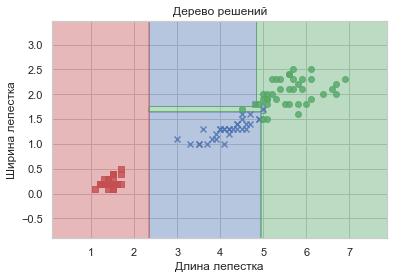

In [38]:
classification_tree = DecisionTreeClassifier()

classification_tree.fit(X_train, y_train)
plot_classifier_regios(X_train, y_train, classification_tree)
plt.title('Дерево решений')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

In [40]:
# пример со всеми признаками
classification_tree = DecisionTreeClassifier()

# обучение модели
classification_tree = classification_tree.fit(iris.data, iris.target)

In [41]:
# Посмотреть полученное дерево можно с помощью библиотеки graphviz
import graphviz 
from sklearn import tree


dot_data = tree.export_graphviz(classification_tree, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,
                     filled=True, rounded=True,
                     special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris")

'iris.pdf'

Выглядит полученное решение следующим образом 

![classification_img5.bmp](media/classification_img5.bmp)

параметры 

**max_depth**: максимальная глубина дерева — точка, на которой останавливается разбиение узлов. Это похоже на выбор максимального количества слоев в глубокой нейронной сети. Меньшее количество сделает модель быстрой, но не точной. Большее количество увеличивает точность, но создает риски переобучения и замедляет процесс.

**max_features**: число признаков для поиска лучшей точки для разбиения. Чем больше число, тем лучше результат. Но в этом случае обучение займет больше времени.

**min_impurity_split**: порог для ранней остановки роста дерева. Узел разобьется только в том случае, если его точность будет выше указанного порога. Такой метод может служить в качестве компромисса между минимизацией переобучения (высокое значение, маленькое дерево) и высокой точностью (низкое значение, большое дерево).

**presort**: выбор того, нужно ли предварительно сортировать данные для ускорения поиска наилучшего разбиения при подборе. Если данные заранее отсортируются по каждому признаку, то алгоритму обучения будет гораздо проще найти хорошие значения для разбиения.

Одинокое дерево решений один из лучших вариантов для того чтобы понять логику разделения обучающей выборки. На практике, дерево решений подходит для исследования предметной области, когда полученная инорфмация в последствии нужна для работы лиц принимающих решения или при построения алгоритмов диагностики и поиска неисправности технических систем.

## Случайный лес

Если не контролировать глубину и не проводить усечение одиночного дерево, то такая модель в очень склонна к переобучению т.е. к повторению обучающей выборки. Хорошим развитием идей решающих правил является применения ансамбля решающих деревьев или случайного леса (Random Forest).

Есть два принципиально разных подхода к формированию случайного леса:

1) На разных частях обучающей выборки и построить деревья каждый раз разрешая использовать не полный набор признаков. Для распознавания можно провести голосование деревьев. Определяется класс по всем деревьям, класс с наибольшим количеством голосов является результатом. Такой подход называется беггинг - bagging(сокр. от <b>bo</b>otstrap <b>agg</b>regat<b>ing</b>)  

2) Другим методом улучшения предсказаний является бустинг (boosting), идея которого заключается в итеративном процессе последовательного построения частных моделей. Каждая новая модель обучается с использованием информации об ошибках, сделанных на предыдущем этапе, а результирующая функция представляет собой линейную комбинацию всего ансамбля моделей с учетом минимизации любой штрафной функции. 

Подобно бэггингу, бустинг является общим подходом, который можно применять ко многим статистическим методам регрессии и классификации. Далее мы более конкретно рассмотрим логику построения ансамблей алгоритмов, а пока что сравним результаты полученные на лесах.

Text(0, 0.5, 'Ширина лепестка')

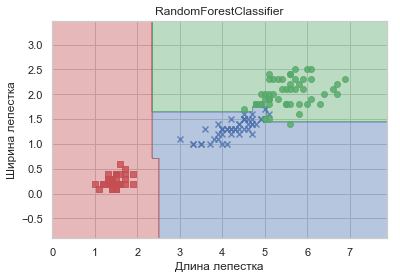

In [42]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


forest = RandomForestClassifier(criterion='entropy',
    n_estimators=10,
    random_state=1,
    n_jobs=2)
forest.fit(X_train, y_train)
plot_classifier_regios(X, y, classifier=forest)
plt.title('RandomForestClassifier')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

Text(0, 0.5, 'Ширина лепестка')

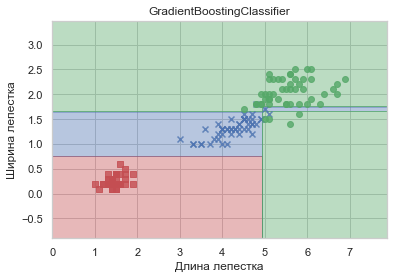

In [43]:
forest = GradientBoostingClassifier(
    n_estimators=10,
    random_state=1,
)
forest.fit(X_train, y_train)
plot_classifier_regios(X, y, classifier=forest)
plt.title('GradientBoostingClassifier')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')

## kNN - Ленивая классификация

Последним алгоритмом который мы обсудим является алгоритм $k$-ближайших соседей ($k-nearest neighbor$, $KNN$). Данный алгоритм строится на идее, что рядом объектами одного класса будет находится объект такого-же класса - Гипотеза компактности. Уже в этом описании заключаются два вопроса, ответы на которые позволят построить качественный классификатор, а именно:

1) Сколько должно быть соседних объектов, чтобы адекватно различать классы?

2) Что такое "рядом"?

Давайте разбираться по порядку. В первую очередь необходимо решить, какое k- соседей необходимо чтобы принять решение? При $k=1$, мы получим плохую обобщающую способность, т.к. только один ближайший сосед будет определять класс незнакомого объекта. С ростом $k$, между соседями начинается конкуренция за присвоение ему своего класса и чем больше будет $k$, тем больше будет таких объектов, и на границах классов ситуация может быть неоднозначная. Рассмотрим ситуацию когда все $k=3$ ближайших соседи,  относятся к разным классам, в таком случае имеет место быть взвешенное голосвание, результирующий класс по самому ближайшему из всех соседей. Если при $k=3$, два соседа одного класса находятся далеко, а самый ближайший объект другого класса, взвешенное голосование позволит определить класс примера наиболее точно.
$votes(class)= \sum \limits _{i=1}^k \frac {1} {d(x^{(1)},x^{(2)})}$
Здесь функция $d(x^{(1)},x^{(2)})$- функуция определяющая расстояние между объектами. Самое простое это Евклидово расстояние которе определяется как корень суммы квадратов разности координат:

$d(x^{(1)},x^{(2)}) = \sqrt {\sum \limits _{j=1}^m(x^{(1)}_j - x^{(2)}_j)^2}$

Существуют и другие варианты, например манхетенское расстояние

$d(x^{(1)},x^{(2)}) = \sum \limits _{j=1}^m(x^{(1)}_j - x^{(2)}_j)$

Важно понимать, что раз речь зашла о расстояниях, то масштаб в котом выражены разные признаки также оказывает влияние на результат классификации (из за того что под один знак суммы попадают разности различных координат). Для того чтобы избежать этого влияния перед обучением модели необходимо производить нормализацию признаков - уложить их в один масштаб. Распространены два вида нормализации:  
1) минимаксная нормализация: $x^{(i)}_{new} = \frac{x^{(i)} - x_{min}} {x_{max}-x_{min}}$;  
2) нормализация с помощью стандартного отклонения: $x^{(i)}_{new} = \frac{x^{(i)} - x_{mean}} {\sigma_x}$.

Text(0, 0.5, 'Ширина лепестка')

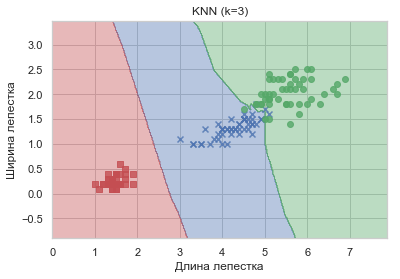

In [44]:
from sklearn.neighbors import KNeighborsClassifier


neighbors = KNeighborsClassifier(
    n_neighbors=3,  # устанавливаем количетво соседей
    metric='minkowski',
    p=2  # Евклидово расстояние является частным случаем метрики Минковского при p=2
)
neighbors.fit(X_train, y_train)
plot_classifier_regios(X, y, classifier=neighbors)
plt.title('KNN (k=3)')
plt.xlabel('Длина лепестка')
plt.ylabel('Ширина лепестка')


На практике идея компактности имеет ряд достоинств:
* простота интерпретации;
* хорошо работает на небольших выборках;
* подходит для беглово взгляда на данные;
* работает как классификацией так и с регрессией, так и с кластеризацией.  

Сложности использования данного алгоритма заключаются кроются в большом количестве гиперпараметров для тонкой настроки алгоритма и качественного препроцессинга.